## Analyse model filter

In [1]:
import pandas as pd
from utils import *


precision_points = [1, 3, 6]
datasets = ['value', 'one_hot', 'binary', 'tenfold_binary']

df_original, df_altered = set_up_and_print_metrics(datasets[0], precision_points[0])

value with 1 DP


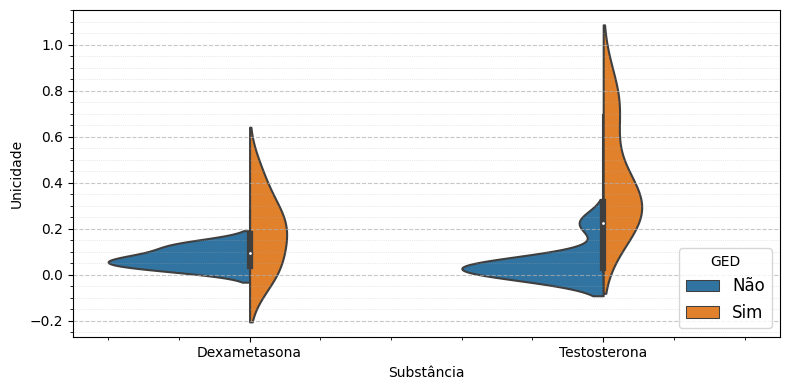

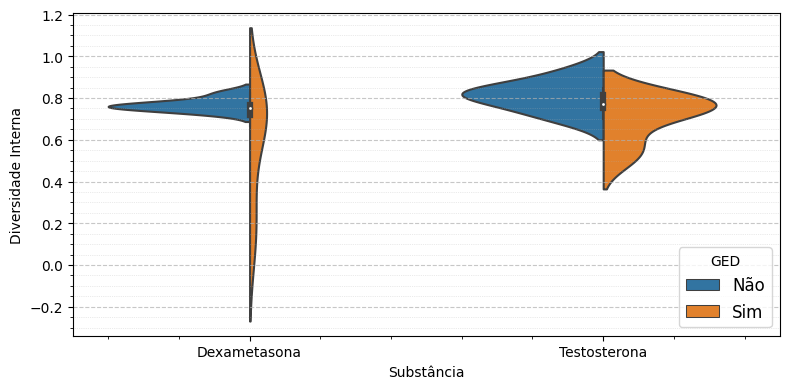

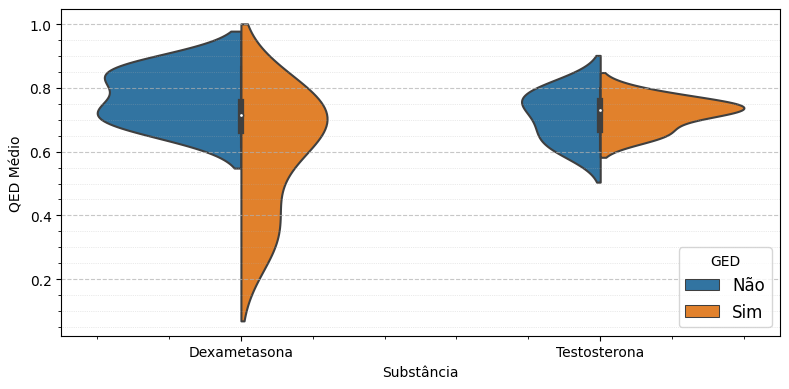

For n column:
For original model: 190.00, 177.70
For altered model: 893.43, 667.32


For unique column:
For original model: 0.06, 0.06
For altered model: 0.30, 0.22


For div column:
For original model: 0.79, 0.06
For altered model: 0.64, 0.21


For qed_mid column:
For original model: 0.74, 0.08
For altered model: 0.66, 0.14


For unique column:
For original model:
Dexametasona: 0.07 +- 0.04%, mediana de 0.07
Testosterona: 0.05 +- 0.08%, mediana de 0.03
For altered model:
Dexametasona: 0.18 +- 0.15%, mediana de 0.19
Testosterona: 0.42 +- 0.22%, mediana de 0.32


For div column:
For original model:
Dexametasona: 0.77 +- 0.03%, mediana de 0.76
Testosterona: 0.81 +- 0.07%, mediana de 0.82
For altered model:
Dexametasona: 0.58 +- 0.27%, mediana de 0.71
Testosterona: 0.71 +- 0.11%, mediana de 0.76


For qed_mid column:
For original model:
Dexametasona: 0.77 +- 0.08%, mediana de 0.76
Testosterona: 0.71 +- 0.07%, mediana de 0.73
For altered model:
Dexametasona: 0.60 +- 0.18%, mediana de 0.68


In [3]:
print(f'{datasets[0]} with {precision_points[0]} DP')
plot_info_model_filter_swapped(df_original, df_altered, 'dataset', 'unique', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))
plot_info_model_filter_swapped(df_original, df_altered, 'dataset', 'div', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))
plot_info_model_filter_swapped(df_original, df_altered, 'dataset', 'qed_mid', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))


print_results_model(df_original, df_altered, 'n')
print_results_model(df_original, df_altered, 'unique')
print_results_model(df_original, df_altered, 'div')
print_results_model(df_original, df_altered, 'qed_mid')

print_results_model_with_substance_analysis(df_original, df_altered, 'unique')
print_results_model_with_substance_analysis(df_original, df_altered, 'div')
print_results_model_with_substance_analysis(df_original, df_altered, 'qed_mid')

In [4]:
datasets = ['value', 'one_hot', 'binary', 'tenfold_binary']
decemal_points = 6

[set_up_and_print_metrics(decemal_points, dataset) for dataset in datasets]

FileNotFoundError: [Errno 2] No such file or directory: '../TransGEM-main/result/df_fame_test/decimal_points_value/6/_maxint_10_genelength978_dim64_n6h8ff512_bh4_lr0.0001.csv'

In [8]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

existing_molecules = []

def get_generated_molecules(l: list) -> list:
    '''Get each generated molecule'''
    columns = l.str.slice(1, -1).str.replace('"', '').str.split("', '")
    for column in columns:
        column[0] = column[0][1:]
    return columns

def compare(list_molecules: list, existing_molecules: list) -> list:
    '''Compare each generated molecule and see if it aleady exists in train and test molecules set'''
    results = []
    for list_m in list_molecules:
        count_sucess = 0
        for item in list_m:
            if item in existing_molecules:
                count_sucess = count_sucess + 1
        results.append(1 - count_sucess/len(list_m))
    
    return results

def generate_novelty() -> None:
    '''Add novelty metics in validation dataset.'''
    list_molecules = get_generated_molecules(df_original.preds)
    novelty_original = compare(list_molecules, existing_molecules)
    df_original['novelty'] = pd.Series(novelty_original)

    list_molecules = get_generated_molecules(df_altered.preds)
    novelty_altered = compare(list_molecules, existing_molecules)
    df_altered['novelty'] = pd.Series(novelty_altered)


def plot_info_model_filter_original(dataset:str, column: str, type='boxplot') -> None:
    '''Plots distribution of metrics to each validation sample'''

    df_original['GED'] = 'Não'
    df_altered['GED'] = 'Sim'

    df_combined = pd.concat([df_original[df_original['substance'] == 'dexamethasone'], 
                             df_altered[df_altered['substance'] == 'dexamethasone']])
    df_combined['Subset'] = 'dexamethasone'

    df_combined_2 = pd.concat([df_original[df_original['substance'] == 'testosterone'], 
                               df_altered[df_altered['substance'] == 'testosterone']])
    df_combined_2['Subset'] = 'testosterone'

    df_final = pd.concat([df_combined, df_combined_2])

    g = sns.FacetGrid(df_final, col="Subset", sharey=True, height=4, aspect=1.2)
    if (type == 'violine'):
        g.map(sns.violinplot, "GED", column, palette="Set2")
    elif (type == 'boxplot'):
        g.map(sns.boxplot, "GED", column, palette="Set2")

    g.set_titles("{col_name}")
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    g.set_axis_labels("GED", column.title())
    
    plt.suptitle(f"Dataset {dataset.title()}: Box Plots for {column.title()} Across Substances", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_info_model_filter(dataset: str, column: str, type: str='boxplot', dodge_spacing: bool=True, box_width:float=0.6, figsize: tuple=(10, 6)) -> None:
    '''Plots distribution of metrics to each validation sample'''

    # Adding 'GED' column
    df_original['GED'] = 'Não'
    df_altered['GED'] = 'Sim'

    metrics_map = {
        'unique': 'Unicidade',
        'div': 'Diversidade Interna',
        'qed_mid': 'QED Médio'
    }

    # Combining subsets for both substances
    df_combined = pd.concat([df_original, df_altered])
    df_combined = df_combined[df_combined['substance'].isin(['Dexametasona', 'Testosterona'])]
    
    # Creating the plot
    plt.figure(figsize=figsize)
    
    if type == 'violine':
        sns.violinplot(
            data=df_combined, x="GED", y=column, hue="substance", 
            palette="Set2", split=dodge_spacing
        )
    elif type == 'boxplot':
        sns.boxplot(
            data=df_combined, x="GED", y=column, hue="substance", 
            palette="Set2", dodge=dodge_spacing, width=box_width
        )

    # Adding grid
    plt.grid(visible=True, which='major', axis='y', linestyle='--', linewidth=0.8, alpha=0.7)
    plt.minorticks_on()  # Enable minor ticks
    plt.grid(visible=True, which='minor', axis='y', linestyle=':', linewidth=0.5, alpha=0.5)

    # Legend, title, and layout
    plt.legend(title='Substância', loc='lower left')
    plt.tight_layout()

    plt.ylabel(metrics_map[column])
    plt.xlabel('GED')
    # Show plot
    plt.show()

def plot_info_model_filter_swapped(dataset: str, column: str, type='boxplot', legend_loc: int=0, dodge_spacing=True, box_width=0.6, figsize=(10, 6)) -> None:
    '''Plots distribution of metrics to each validation sample, swapped'''
    
    # Adding 'GED' column
    df_original['GED'] = 'Não'
    df_altered['GED'] = 'Sim'

    metrics_map = {
        'unique': 'Unicidade',
        'div': 'Diversidade Interna',
        'qed_mid': 'QED Médio'
    }

    # Combining subsets for both substances
    df_combined = pd.concat([df_original, df_altered]).reset_index()
    df_combined = df_combined[df_combined['substance'].isin(['Dexametasona', 'Testosterona'])]
    
    # Creating the plot
    plt.figure(figsize=figsize)
    
    if type == 'violine':
        sns.violinplot(
            data=df_combined, x="substance", y=column, hue="GED", 
            palette="tab10", split=dodge_spacing
        )
    elif type == 'boxplot':
        sns.boxplot(
            data=df_combined, x="substance", y=column, hue="GED", 
            palette="tab10", dodge=dodge_spacing, width=box_width
        )

    # Adding grid
    plt.grid(visible=True, which='major', axis='y', linestyle='--', linewidth=0.8, alpha=0.7)
    plt.minorticks_on()  # Enable minor ticks
    plt.grid(visible=True, which='minor', axis='y', linestyle=':', linewidth=0.5, alpha=0.5)

    # Legend, title, and layout
    plt.legend(title='GED', loc=legend_loc, fontsize=12)
    plt.tight_layout()

    plt.ylabel(metrics_map[column])
    plt.xlabel('Substância')
    # Show plot
    plt.show()


def print_results_model(col: str) -> None:
    '''Prints mean and stendart desviation to each smaple.'''
    print(f'For {col} column:')
    print(f'For original model: {df_original[col].mean():.2f}, {df_original[col].std():.2f}')
    print(f'For altered model: {df_altered[col].mean():.2f}, {df_altered[col].std():.2f}')
    print("\n")


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

macro_path = 'results_4'
precision = 3
dataset = 'tenfold_binary'
# dataset = 'binary'
# dataset = 'one_hot'
# dataset = 'value'
type = 1

path_normal = f'{macro_path}/df_fame_test/decimal_points_{precision}/{dataset}/_maxint_10_genelength978_dim64_n6h8ff512_bh4_lr0.0001.csv'
path_changed = f'{macro_path}/df_fame_cl_test/decimal_points_{precision}/{dataset}/_maxint_0_genelength64_dim64_n6h8ff512_bh4_lr0.0001.csv'


df_original = pd.read_csv(path_normal)
df_altered = pd.read_csv(path_changed)

df_train = pd.read_csv('data_used/df_fame_train.csv')
df_val = pd.read_csv('data_used/df_fame_val.csv')



test_samples = pd.read_csv('df_fame_test.csv')

df_original['substance'] = test_samples.pert_iname
df_altered['substance'] = test_samples.pert_iname

map_substance = {
    'dexamethasone': 'Dexametasona',
    'testosterone': 'Testosterona'
}

df_original['substance'] = df_original['substance'].apply(lambda x: map_substance[x])
df_altered['substance'] = df_altered['substance'].apply(lambda x: map_substance[x])


df_original['n'] = df_original.unique.apply(lambda x: int(x*3000))
df_altered['n'] = df_altered.unique.apply(lambda x: int(x*3000))

print(f'Dataset: {dataset}')

if (df_original.valid.mean() != 1):
    print('Not all molecules are valid!')


def print_results_model(col: str):
    '''Print result '''

    print(f'For {col} column:')
    print(f'For original model: {df_original[col].mean():.2f}, {df_original[col].std():.2f}')
    print(f'For altered model: {df_altered[col].mean():.2f}, {df_altered[col].std():.2f}')
    print("\n")

def print_results_model_with_substance_analysis(col: str):
    '''Return prints about substane analysis.'''
    
    print(f'For {col} column:')
    print(f'For original model:')
    print(f"{df_original.groupby('substance')[col].mean().index[0]}: {df_original.groupby('substance')[col].mean()[0]:.2f} +- {df_original.groupby('substance')[col].std()[0]:.2f}%, mediana de {df_original.groupby('substance')[col].median()[0]:.2f}")
    print(f"{df_original.groupby('substance')[col].mean().index[1]}: {df_original.groupby('substance')[col].mean()[1]:.2f} +- {df_original.groupby('substance')[col].std()[1]:.2f}%, mediana de {df_original.groupby('substance')[col].median()[1]:.2f}")
    print(f'For altered model:')
    print(f"{df_altered.groupby('substance')[col].mean().index[0]}: {df_altered.groupby('substance')[col].mean()[0]:.2f} +- {df_altered.groupby('substance')[col].std()[0]:.2f}%, mediana de {df_altered.groupby('substance')[col].median()[0]:.2f}")
    print(f"{df_altered.groupby('substance')[col].mean().index[1]}: {df_altered.groupby('substance')[col].mean()[1]:.2f} +- {df_altered.groupby('substance')[col].std()[1]:.2f}%, mediana de {df_altered.groupby('substance')[col].median()[1]:.2f}")
    print("\n")


print(f'{dataset} with {precision} DP')
# plot_info_model_filter_swapped('dataset', 'unique', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))
# plot_info_model_filter_swapped('dataset', 'div', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))
# plot_info_model_filter_swapped('dataset', 'qed_mid', type='violine', legend_loc= 4, dodge_spacing=True, figsize=(8, 4))



print(f'For Datast {dataset} with precision {precision}:\n\n')
print_results_model('n')
print_results_model('unique')
print_results_model('div')
print_results_model('qed_mid')

print_results_model_with_substance_analysis('unique')
print_results_model_with_substance_analysis('div')
print_results_model_with_substance_analysis('qed_mid')

# existing_molecules = list(pd.concat([df_train.smiles, df_val.smiles]))
# generate_novelty()

# print_results_model('novelty')

Dataset: tenfold_binary
tenfold_binary with 3 DP
For Datast tenfold_binary with precision 3:


For n column:
For original model: 1683.36, 142.84
For altered model: 1227.50, 311.58


For unique column:
For original model: 0.56, 0.05
For altered model: 0.41, 0.10


For div column:
For original model: 0.72, 0.02
For altered model: 0.82, 0.03


For qed_mid column:
For original model: 0.73, 0.01
For altered model: 0.77, 0.03


For unique column:
For original model:
Dexametasona: 0.53 +- 0.02%, mediana de 0.54
Testosterona: 0.59 +- 0.04%, mediana de 0.59
For altered model:
Dexametasona: 0.42 +- 0.11%, mediana de 0.38
Testosterona: 0.39 +- 0.10%, mediana de 0.44


For div column:
For original model:
Dexametasona: 0.71 +- 0.03%, mediana de 0.70
Testosterona: 0.73 +- 0.01%, mediana de 0.74
For altered model:
Dexametasona: 0.83 +- 0.02%, mediana de 0.83
Testosterona: 0.81 +- 0.04%, mediana de 0.82


For qed_mid column:
For original model:
Dexametasona: 0.72 +- 0.01%, mediana de 0.71
Testosterona

In [16]:

print_results_model('qed_mid')
print_results_model_with_substance_analysis('qed_mid')

For qed_mid column:
For original model: 0.73, 0.01
For altered model: 0.77, 0.03


For qed_mid column:
For original model:
Dexametasona: 0.53 +- 0.02%, mediana de 0.54
Testosterona: 0.59 +- 0.04%, mediana de 0.59
For altered model:
Dexametasona: 0.42 +- 0.11%, mediana de 0.38
Testosterona: 0.39 +- 0.10%, mediana de 0.44




In [34]:
l = [
    f'Embedding: {dataset}\n'
    'Dexametasona without GED:\n'
    f'unique: {df_original[df_original['substance'] == 'Dexametasona'].unique.max():.2f}',  # Testosterona
    f'InDiv: {df_original[df_original['substance'] == 'Dexametasona']['div'].max():.2f}',
    f'QED_medio: {df_original[df_original['substance'] == 'Dexametasona'].qed_mid.max():.2f}',
    '\nDexametasona with GED:\n'
    f'unique: {df_altered[df_altered['substance'] == 'Dexametasona'].unique.max():.2f}',  # Testosterona
    f'InDiv: {df_altered[df_altered['substance'] == 'Dexametasona']['div'].max():.2f}',
    f'QED_medio: {df_altered[df_altered['substance'] == 'Dexametasona'].qed_mid.max():.2f}',
    '\n\nTestosterona without GED:\n'
    f'unique: {df_original[df_original['substance'] == 'Testosterona'].unique.max():.2f}',  # Testosterona
    f'InDiv: {df_original[df_original['substance'] == 'Testosterona']['div'].max():.2f}',
    f'QED_medio: {df_original[df_original['substance'] == 'Testosterona'].qed_mid.max():.2f}'
    '\n\nTestosterona with GED:\n'
    f'unique: {df_altered[df_altered['substance'] == 'Testosterona'].unique.max():.2f}',  # Testosterona
    f'InDiv: {df_altered[df_altered['substance'] == 'Testosterona']['div'].max():.2f}',
    f'QED_medio: {df_altered[df_altered['substance'] == 'Testosterona'].qed_mid.max():.2f}',
]

[print(i) for i in l]


Embedding: binary
Dexametasona without GED:
unique: 0.91
InDiv: 0.46
QED_medio: 0.59

Dexametasona with GED:
unique: 0.31
InDiv: 0.76
QED_medio: 0.79


Testosterona without GED:
unique: 0.96
InDiv: 0.96
QED_medio: 0.59

Testosterona with GED:
unique: 0.37
InDiv: 0.70
QED_medio: 0.78


[None, None, None, None, None, None, None, None, None, None, None]

In [17]:
l = [
    df_original[df_original['substance'] == 'Testosterona'].unique.max(),  # Testosterona
    df_original[df_original['substance'] == 'Testosterona']['div'].max(),
    df_original[df_original['substance'] == 'Testosterona'].qed_mid.max()
]

[print(i) for i in l]


existing_molecules = list(pd.concat([df_train.smiles, df_val.smiles]))
generate_novelty()


0.9323333333333332
0.6270611333846967
0.6660359762464696


[None, None, None]

# Other Section

In [5]:
df_original

,ID,preds,valid,unique,div,qed_mid,qed,mw_mid,mw,sa_mid,sa,substance,n,GED
0,sample0,['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C...,1.0,0.889000,0.191004,0.192243,"[0.5794734569440703, 0.4298828832001217, 0.413...",627.5660,"[627.5660000000004, 627.5660000000004, 627.566...",4.943202,"[1.5149307387756714, 3.0204642760968117, 3.268...",Dexametasona,2667,Não
1,sample1,"['CN(O)CO', 'CS(=O)(=O)C=O', 'C1=CC(C=CC=CC=CC...",1.0,0.634333,0.557556,0.627681,"[0.6667136904489599, 0.6587065954179188, 0.655...",627.5660,"[653.5600000000004, 628.5990000000004, 628.599...",1.990146,"[1.5149307387756714, 1.7383038156987496, 1.834...",Dexametasona,1903,Não
2,sample2,"['CN(O)CO', 'CN(O)COCO', 'C1[C@H][C@@H](O)[C@H...",1.0,0.741000,0.218506,0.568275,"[0.6043805909002611, 0.6043805909002611, 0.589...",654.5680,"[654.5680000000006, 654.5680000000006, 654.568...",2.621336,"[2.0191468438268245, 2.1875847512908972, 2.567...",Testosterona,2223,Não
3,sample3,['C1[C@H][C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H]...,1.0,0.732667,0.212126,0.476025,"[0.6043805909002611, 0.5868053776989457, 0.542...",637.5610,"[637.5610000000005, 637.5610000000005, 637.561...",3.109309,"[2.0191468438268245, 2.567664745924727, 2.6006...",Testosterona,2198,Não
4,sample4,['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C...,1.0,0.821000,0.226196,0.205997,"[0.5794734569440703, 0.4298828832001217, 0.413...",627.5660,"[627.5660000000004, 627.5660000000004, 627.566...",4.938184,"[1.5149307387756714, 2.0191468438268245, 3.020...",Dexametasona,2463,Não
5,sample5,"['CC(=O)O', 'CS(=O)(=O)C=O', 'CS(=O)(=O)O', 'C...",1.0,0.495667,0.627061,0.666036,"[0.7148329372562187, 0.7078849822330918, 0.677...",637.5610,"[637.5610000000005, 637.5610000000005, 637.561...",1.999702,"[1.5149307387756714, 1.6443780326380129, 1.738...",Testosterona,1486,Não
6,sample6,['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C...,1.0,0.704333,0.270648,0.201878,"[0.4298828832001217, 0.3671243763304295, 0.319...",625.5500,"[626.5580000000003, 626.5580000000003, 625.550...",4.943202,"[1.5149307387756714, 3.2287808298408107, 3.958...",Testosterona,2113,Não
7,sample7,['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C...,1.0,0.777000,0.219042,0.421369,"[0.5794734569440703, 0.5570756338907598, 0.435...",640.5630,"[653.5600000000005, 653.5600000000005, 653.560...",2.795098,"[1.5149307387756714, 1.8347076618525975, 2.019...",Dexametasona,2331,Não
8,sample8,"['CC(=O)O', 'CS(=O)(=O)C=O', 'CS(=O)(=O)O', 'C...",1.0,0.476667,0.562246,0.647105,"[0.7078849822330918, 0.6770979593837407, 0.677...",654.5680,"[654.5680000000004, 654.5680000000004, 654.568...",1.713815,"[1.5149307387756714, 1.5647055331121216, 1.572...",Testosterona,1430,Não
9,sample9,"['CC(=O)O', 'CS(=O)(=O)C=O', 'CC(=O)NC=O', 'C1...",1.0,0.475333,0.475691,0.588219,"[0.6770979593837407, 0.643609028629526, 0.6424...",637.5610,"[654.5680000000006, 654.5680000000006, 637.561...",1.786506,"[1.5149307387756714, 1.5647055331121216, 1.572...",Dexametasona,1425,Não


In [6]:
df_altered

,ID,preds,valid,unique,div,qed_mid,qed,mw_mid,mw,sa_mid,sa,substance,n,GED
0,sample0,"['C=1OC=CC=C=1', 'C/N=C(C)CCCCCC(=O)O', 'NS(=O...",1.0,0.877000,0.324556,0.642372,"[0.644897874064034, 0.644897874064034, 0.64489...",698.7090,"[698.7090000000002, 698.7090000000002, 698.709...",1.483474,"[1.4355478907544814, 1.459329930302479, 1.4593...",Dexametasona,2631,Sim
1,sample1,"['C=1OC=CC=C=1', 'C1OC=C1C', 'C/N=C(C)CCCCCC(=...",1.0,0.076333,0.767299,0.640153,"[0.644897874064034, 0.6448978740640339, 0.6423...",285.4520,"[327.42500000000007, 313.398, 301.386999999999...",1.483474,"[1.4355478907544814, 1.459329930302479, 1.4593...",Dexametasona,228,Sim
2,sample2,"['C=1OC=CC=C=1', 'C/N=C(C)CCCCCC(=O)O', 'C/N=C...",1.0,0.005333,0.829644,0.489439,"[0.644897874064034, 0.5646473403112017, 0.4952...",171.2400,"[196.24599999999998, 183.295, 183.294999999999...",2.502244,"[1.643876892621826, 2.330815354160288, 2.37085...",Testosterona,15,Sim
3,sample3,"['C=1OC=CC=C=1', 'C/N=C(C)CCCCCC(=O)O', 'CC(=O...",1.0,0.008333,0.788707,0.567665,"[0.644897874064034, 0.5783198770575686, 0.5783...",177.2435,"[210.27299999999997, 197.32199999999997, 196.2...",1.987346,"[1.5080295670664619, 1.5080295670664619, 1.533...",Testosterona,24,Sim
4,sample4,"['C=1OC=CC=C=1', 'C/N=C(C)CCCCCC(=O)O', 'C2CCC...",1.0,0.975000,0.470172,0.640153,"[0.644897874064034, 0.6448978740640339, 0.6423...",716.6800,"[730.7070000000001, 730.7070000000001, 716.680...",1.483474,"[1.4355478907544814, 1.459329930302479, 1.4593...",Dexametasona,2925,Sim
5,sample5,"['C2CCCCC1CC(=O)OC[C@]12C=O', 'NS(=O)(=O)C=O',...",1.0,0.065667,0.733706,0.644528,"[0.6673989322890403, 0.6470786338445588, 0.644...",353.6350,"[355.56300000000005, 355.56300000000005, 353.6...",2.264021,"[1.459329930302479, 1.459329930302479, 1.48347...",Testosterona,196,Sim
6,sample6,"['C=1OC=CC=C=1', 'CCC(=O)F', 'CCC(=O)F', 'CCC(...",1.0,0.001667,0.912005,0.414577,"[0.49121953439024435, 0.42376556156326056, 0.4...",80.0860,"[171.24, 109.10599999999998, 80.086, 76.07, 62...",2.636291,"[2.330815354160288, 2.451955022946299, 2.63629...",Testosterona,4,Sim
7,sample7,"['C=1OC=CC=C=1', 'CCC/C(C)CCC(=O)O', 'CCCCCC(=...",1.0,0.896333,0.636437,0.749349,"[0.7782345861407592, 0.7692785118178007, 0.751...",672.6710,"[686.6980000000001, 686.6980000000001, 672.671...",1.471402,"[1.4355478907544814, 1.4355478907544814, 1.459...",Dexametasona,2689,Sim
8,sample8,"['CCSC(=O)C=O', 'C/N=C(C)CCCCCC(=O)O', 'CCSC(=...",1.0,0.921333,0.409235,0.656148,"[0.7827312981160331, 0.7827312981160331, 0.763...",796.7190,"[796.7190000000003, 796.7190000000003, 796.719...",1.508030,"[1.4355478907544814, 1.459329930302479, 1.4834...",Testosterona,2763,Sim
9,sample9,"['C=1OC=CC=C=1', 'C2CCCCC1CC(=O)OC[C@]12C=O', ...",1.0,0.700000,0.619252,0.657239,"[0.7692785118178007, 0.7692785118178007, 0.751...",536.5490,"[536.5490000000004, 536.5490000000004, 536.549...",1.471402,"[1.4355478907544814, 1.4355478907544814, 1.459...",Dexametasona,2100,Sim


In [ ]:
df_original

## Scraches

In [50]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_info_model_filter_improved(dataset: str, column: str, plot_type='boxplot') -> None:
    """
    Creates a comparative plot (boxplot or violin plot) for a given column, grouped by substances and GED status.
    
    Parameters:
        dataset (str): Name of the dataset.
        column (str): Column to plot.
        plot_type (str): Type of plot, either 'boxplot' or 'violine'.
    
    Returns:
        None: Displays the plot.
    """
    # Add 'GED' column to differentiate original and altered datasets
    df_original['GED'] = 'Não'
    df_altered['GED'] = 'Sim'

    # Combine and label subsets
    substances = ['dexamethasone', 'testosterone']
    df_final = pd.concat([
        pd.concat([df_original[df_original['substance'] == sub], 
                   df_altered[df_altered['substance'] == sub]]).assign(Subset=sub)
        for sub in substances
    ])

    # Create the FacetGrid
    g = sns.FacetGrid(df_final, col="Subset", sharey=True, height=4, aspect=1.2, despine=False)
    if plot_type == 'violine':
        g.map(sns.violinplot, "GED", column, palette="Set2", linewidth=1)
    elif plot_type == 'boxplot':
        g.map(sns.boxplot, "GED", column, palette="Set2", linewidth=1, width=0.6)

    # Customize the titles and labels
    g.set_titles("{col_name}", size=14)
    g.set_axis_labels("GED", column.title(), fontsize=12)
    g.set_xticklabels(["Não", "Sim"], size=11)
    
    # Add a custom title for the entire plot
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f"{dataset.title()}: Distribution of {column.title()} by Substances and GED Status",
                   fontsize=16, weight='bold')
    
    # Final layout adjustments
    g.set(ylim=(0, df_final[column].max() * 1.1))  # Add padding to y-axis
    # g.fig.tight_layout(w_pad=1)  # Add space between plots
    sns.despine(trim=True)  # Remove excess spines for cleaner look
    
    # Show the plot
    plt.show()


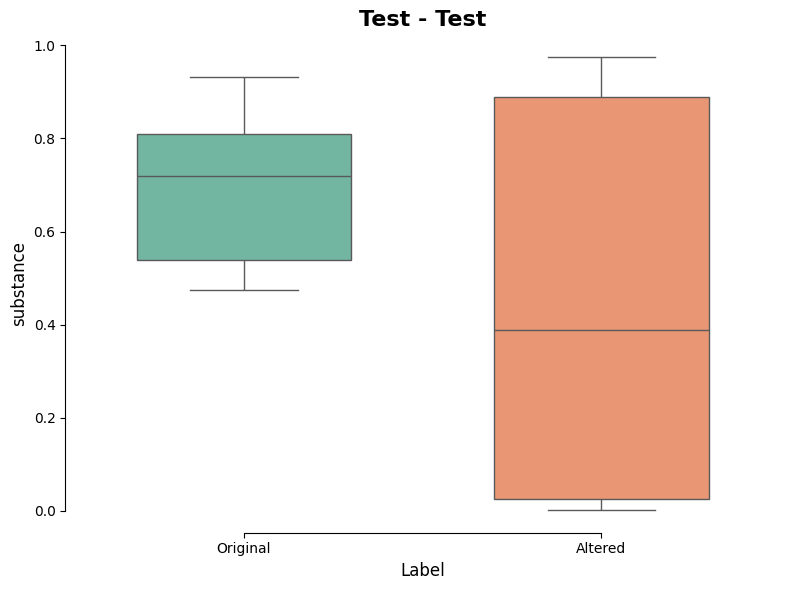

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_r_style_boxplot_combined(df_original, df_altered, column, dataset, title, x_label, y_label):
    """
    Creates a boxplot styled similarly to ggplot2 in R using data from `df_original` and `df_altered`.

    Parameters:
        df_original (pd.DataFrame): Original dataset.
        df_altered (pd.DataFrame): Altered dataset.
        column (str): The numeric column to plot (e.g., "F1").
        dataset (str): Name of the dataset (e.g., "Test").
        title (str): The title of the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.

    Returns:
        None: Displays the plot.
    """
    # Add a label to distinguish between the two datasets
    df_original['Label'] = 'Original'
    df_altered['Label'] = 'Altered'

    # Combine the two DataFrames
    df_combined = pd.concat([df_original, df_altered])

    # Create the plot
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.boxplot(data=df_combined, x='Label', y=column, palette="Set2", width=0.6)

    # Add plot titles and labels
    plt.title(f"{title} - {dataset.title()}", fontsize=16, weight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Remove gridlines for a clean look
    sns.despine(trim=True)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `df_original` and `df_altered` are your DataFrames with a column "F1":
plot_r_style_boxplot_combined(df_original, df_altered, column="unique", dataset="Test", 
                              title="Test", x_label="Label", y_label="substance")


In [4]:


print(f'For Datast {dataset} with precision {precision}:\n\n')
print_results_model('n')
print_results_model('unique')
print_results_model('div')
print_results_model('qed_mid')
print_results_model('novelty')


For Datast value with precision 1:


For n column:
For original model: 190.00, 177.70
For altered model: 893.43, 667.32


For unique column:
For original model: 0.06, 0.06
For altered model: 0.30, 0.22


For div column:
For original model: 0.79, 0.06
For altered model: 0.64, 0.21


For qed_mid column:
For original model: 0.74, 0.08
For altered model: 0.66, 0.14


For novelty column:


KeyError: 'novelty'

Dataset: tenfold_binary
tenfold_binary with 1 DP


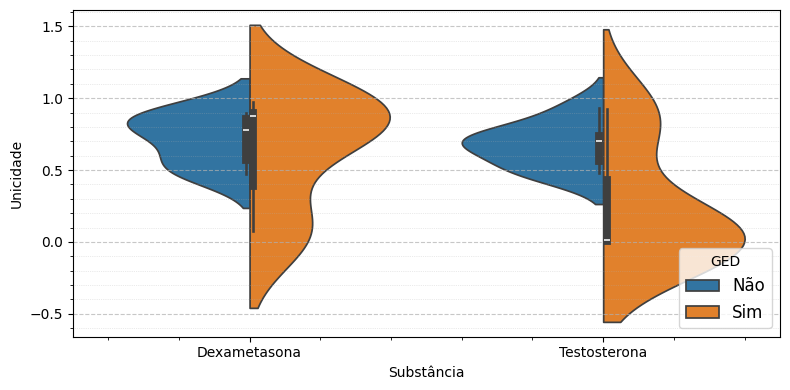

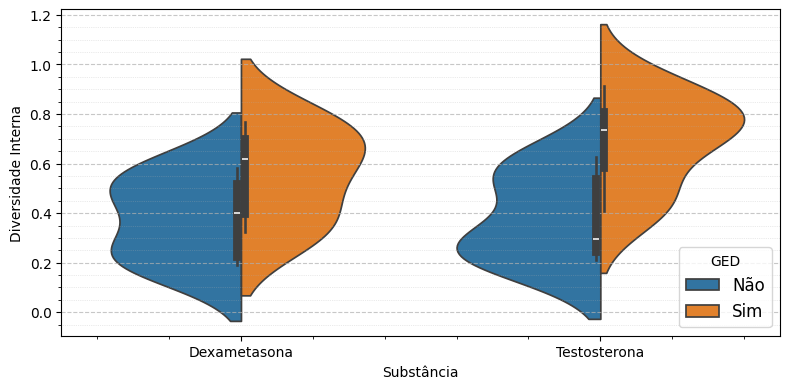

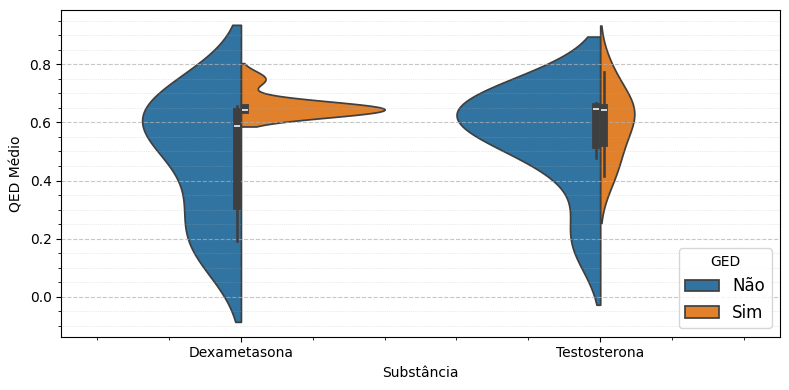

For Datast tenfold_binary with precision 1:


For n column:
For original model: 2081.57, 485.79
For altered model: 1350.57, 1307.75


For unique column:
For original model:
Dexametasona: 0.71 +- 0.18%, mediana de 0.78
Testosterona: 0.67 +- 0.16%, mediana de 0.70
For altered model:
Dexametasona: 0.64 +- 0.40%, mediana de 0.88
Testosterona: 0.26 +- 0.41%, mediana de 0.01


For div column:
For original model:
Dexametasona: 0.71 +- 0.18%, mediana de 0.78
Testosterona: 0.67 +- 0.16%, mediana de 0.70
For altered model:
Dexametasona: 0.64 +- 0.40%, mediana de 0.88
Testosterona: 0.26 +- 0.41%, mediana de 0.01


For qed_mid column:
For original model:
Dexametasona: 0.71 +- 0.18%, mediana de 0.78
Testosterona: 0.67 +- 0.16%, mediana de 0.70
For altered model:
Dexametasona: 0.64 +- 0.40%, mediana de 0.88
Testosterona: 0.26 +- 0.41%, mediana de 0.01




In [28]:
df_original.groupby('substance')['unique'].mean().index

Index(['dexamethasone', 'testosterone'], dtype='object', name='substance')

In [22]:
print(f"{df_original.groupby('substance')['unique'].mean().index[0]}: {df_original.groupby('substance')['unique'].mean()[0]:.2f}%")
print(f"{df_original.groupby('substance')['unique'].mean().index[1]}: {df_original.groupby('substance')['unique'].mean()[1]:.2f}%")

dexamethasone: 0.71%
testosterone: 0.67%


substance
dexamethasone    0.714810
testosterone     0.673048
Name: unique, dtype: float64

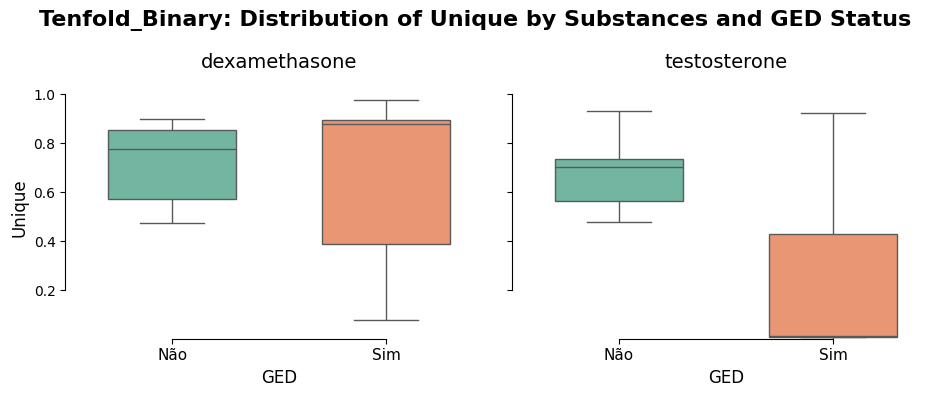

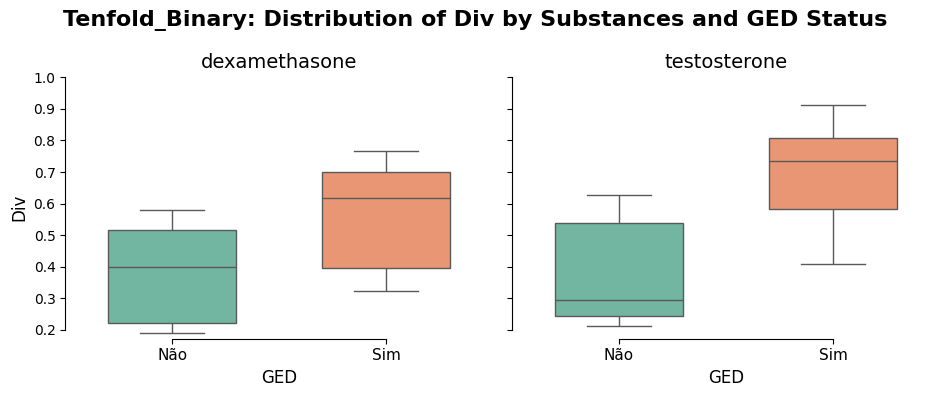

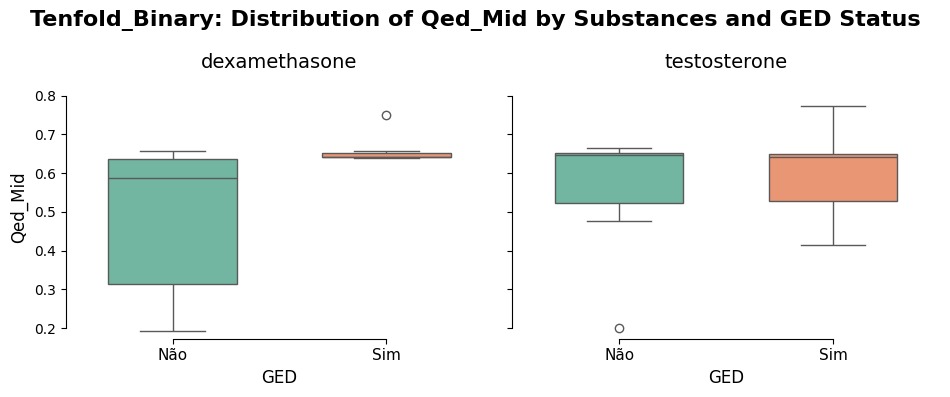

In [34]:
plot_info_model_filter_improved(dataset, "unique")
plot_info_model_filter_improved(dataset, 'div')
plot_info_model_filter_improved(dataset, "qed_mid")

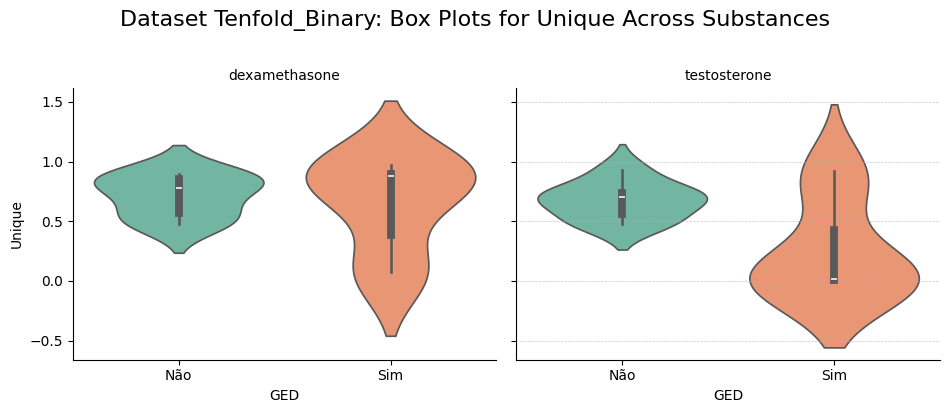

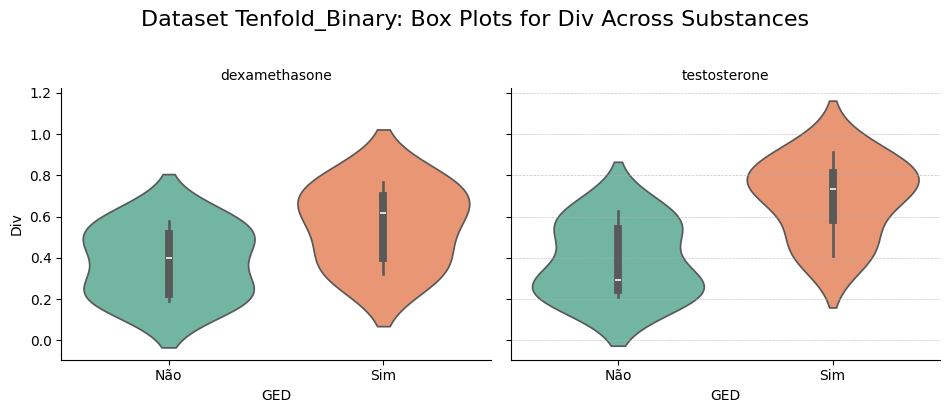

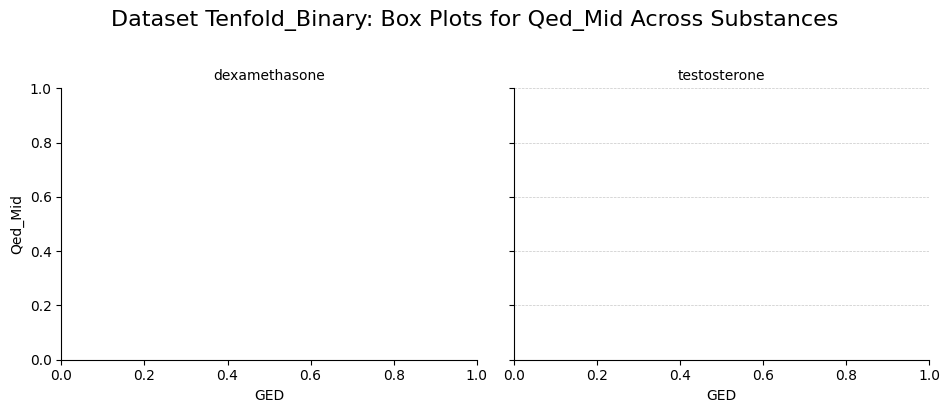

In [56]:
plot_info_model_filter(dataset, "unique", 'violine')
plot_info_model_filter(dataset, 'div', 'violine')
plot_info_model_filter(dataset, "qed_mid", 'voline')

## Analyse Precision Points

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

macro_path = 'results_3_semi_full'
precision = 6
dataset = 'one_hot'
# dataset = 'value'
type = 1

path_precision_6 = f'{macro_path}/df_fame_test/decimal_points_6/{dataset}/_maxint_10_genelength978_dim64_n6h8ff512_bh4_lr0.0001.csv'
path_precision_3 = f'{macro_path}/df_fame_test/decimal_points_3/{dataset}/_maxint_10_genelength978_dim64_n6h8ff512_bh4_lr0.0001.csv'
path_precision_1 = f'{macro_path}/df_fame_test/decimal_points_1/{dataset}/_maxint_10_genelength978_dim64_n6h8ff512_bh4_lr0.0001.csv'
test_samples = pd.read_csv('df_fame_test.csv')

df_precision_6 = pd.read_csv(path_precision_6)
df_precision_3 = pd.read_csv(path_precision_3)
df_precision_1 = pd.read_csv(path_precision_1)

df_precision_6['substance'] = test_samples.pert_iname
df_precision_3['substance'] = test_samples.pert_iname
df_precision_1['substance'] = test_samples.pert_iname

df_precision_6['n'] = df_precision_6.unique.apply(lambda x: int(x*3000))
df_precision_3['n'] = df_precision_3.unique.apply(lambda x: int(x*3000))
df_precision_1['n'] = df_precision_1.unique.apply(lambda x: int(x*3000))


print(df_precision_6['n'].mean())
print(df_precision_3['n'].mean())
print(df_precision_1['n'].mean())


if (
    (df_precision_6.valid.mean() != 1)
    |
    (df_precision_3.valid.mean() != 1)
    |
    (df_precision_1.valid.mean() != 1)
    ):
    print('Not all molecules are valid!')


1083.142857142857
3000.0
518.0714285714286


In [31]:
def print_results(col: str):

    print(f'For {col} column:')
    print(f'For 6 decimal points: {df_precision_6[col].mean():.2f} +- {df_precision_6[col].std():.2f}')
    print(f'For 3 decimal points: {df_precision_3[col].mean():.2f} +- {df_precision_3[col].std():.2f}')
    print(f'For 1 decimal points: {df_precision_1[col].mean():.2f} +- {df_precision_1[col].std():.2f}')
    print("\n")

print(f"Dataset {dataset}")

print_results('n')
print_results('unique')
print_results('div')
print_results('qed_mid')

Dataset one_hot
For n column:
For 6 decimal points: 1083.14 +- 608.13
For 3 decimal points: 3000.00 +- 0.00
For 1 decimal points: 518.07 +- 354.31


For unique column:
For 6 decimal points: 0.36 +- 0.20
For 3 decimal points: 1.00 +- 0.00
For 1 decimal points: 0.17 +- 0.12


For div column:
For 6 decimal points: 0.71 +- 0.17
For 3 decimal points: 0.35 +- 0.05
For 1 decimal points: 0.78 +- 0.02


For qed_mid column:
For 6 decimal points: 0.73 +- 0.07
For 3 decimal points: 0.42 +- 0.03
For 1 decimal points: 0.80 +- 0.04




In [32]:
def plot_info_decimal_points(dataset:str, column: str, type: str='boxplot') -> None:
    df_precision_6['Group'] = 'pts_6'
    df_precision_3['Group'] = 'pts_3'
    df_precision_1['Group'] = 'pts_1'

    df_combined = pd.concat([df_precision_1[df_precision_1['substance'] == 'dexamethasone'], 
                             df_precision_3[df_precision_3['substance'] == 'dexamethasone'],
                             df_precision_6[df_precision_6['substance'] == 'dexamethasone']])
    df_combined['Subset'] = 'dexamethasone'

    df_combined_2= pd.concat([df_precision_1[df_precision_1['substance'] == 'testosterone'], 
                             df_precision_3[df_precision_3['substance'] == 'testosterone'],
                             df_precision_6[df_precision_6['substance'] == 'testosterone']])
    df_combined_2['Subset'] = 'testosterone'

    df_final = pd.concat([df_combined, df_combined_2])

    g = sns.FacetGrid(df_final, col="Subset", sharey=True, height=4, aspect=1.2)
    if (type == 'violine'):
        g.map(sns.violinplot, "Group", column, palette="Set2")
    elif (type == 'boxplot'):
        g.map(sns.boxplot, "Group", column, palette="Set2")

    g.set_titles("{col_name}")
    g.set_axis_labels("Group", column.title())
    
    plt.suptitle(f"{dataset}: Box Plots for {column.title()} Across Substances", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


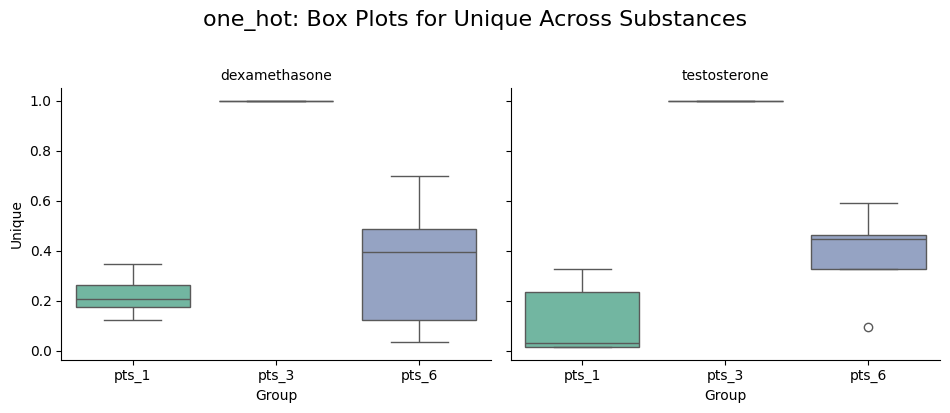

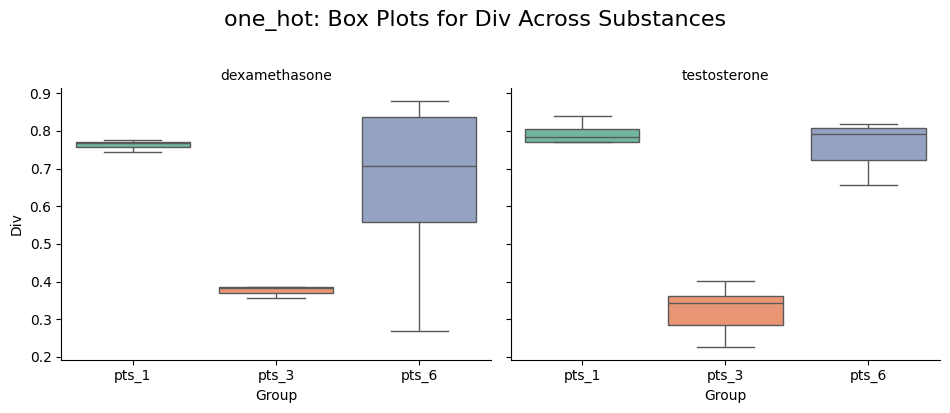

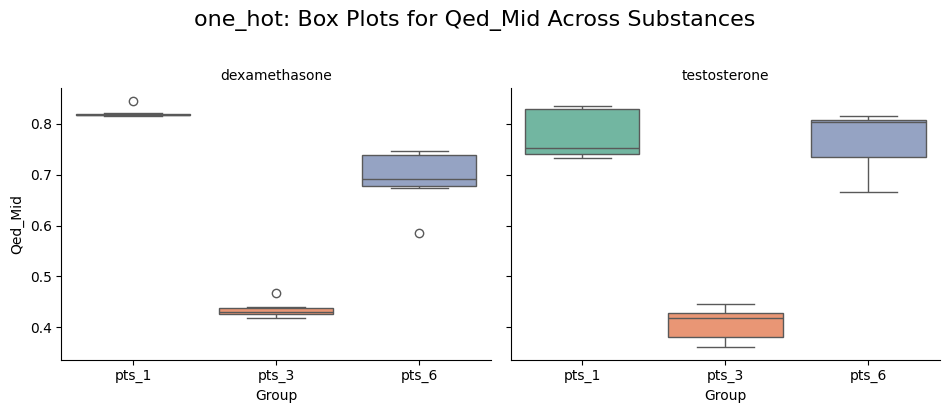

In [11]:
plot_info_decimal_points(dataset, "unique")
plot_info_decimal_points(dataset, 'div')
plot_info_decimal_points(dataset, "qed_mid")

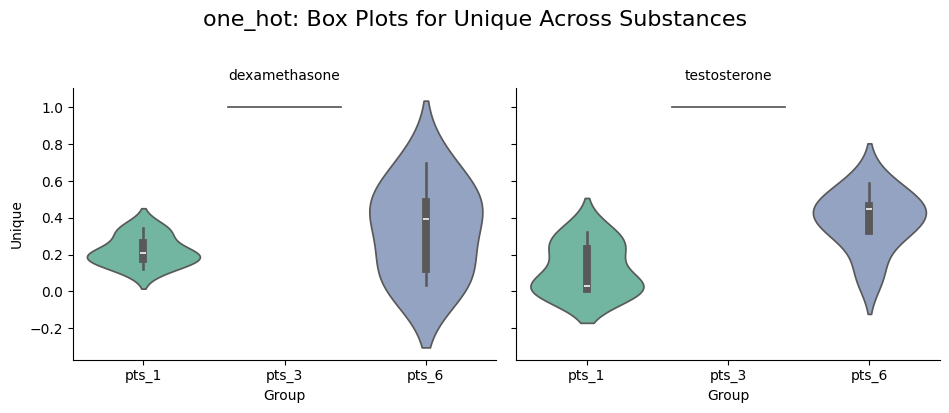

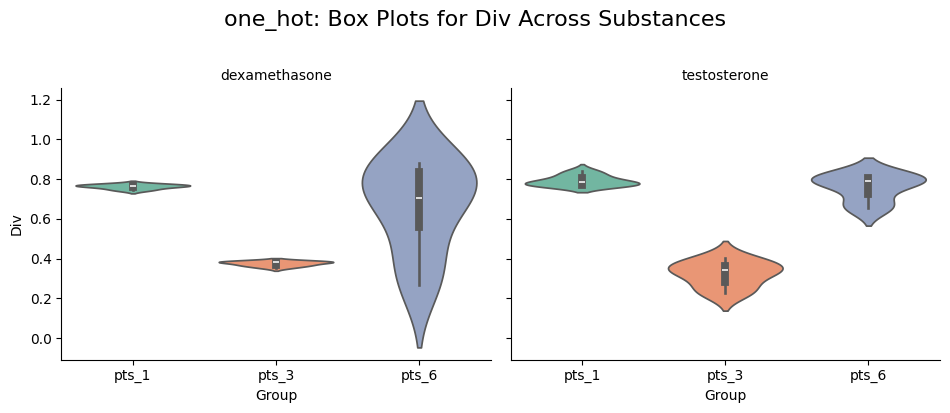

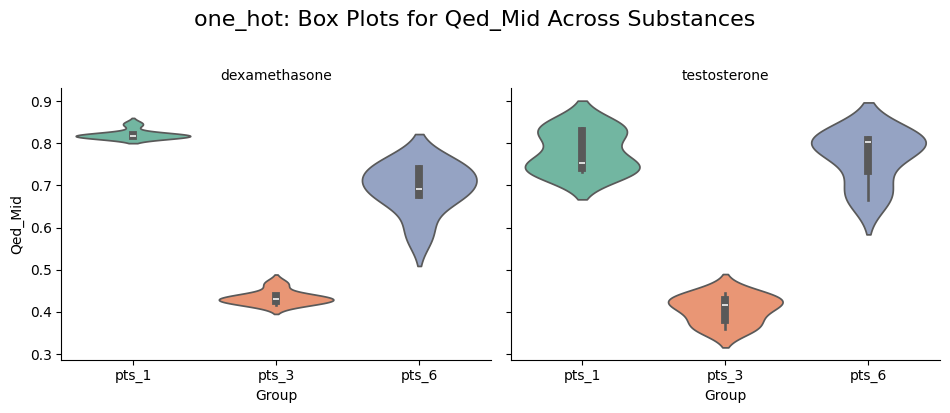

In [12]:
plot_info_decimal_points(dataset, "unique", 'violine')
plot_info_decimal_points(dataset, 'div', 'violine')
plot_info_decimal_points(dataset, "qed_mid", 'violine')

## Calculate Novelty

In [151]:
import pandas as pd

df_train = pd.read_csv('data_used/df_fame_train.csv')
df_val = pd.read_csv('data_used/df_fame_val.csv')

In [88]:
df_original.preds.str.split("', '")

0     [['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[...
1     [['CN(O)CO, CS(=O)(=O)C=O, C1=CC(C=CC=CC=CC2=C...
2     [['CN(O)CO, CN(O)COCO, C1[C@H][C@@H](O)[C@H]1O...
3     [['C1[C@H][C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H...
4     [['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[...
5     [['CC(=O)O, CS(=O)(=O)C=O, CS(=O)(=O)O, CC(=O)...
6     [['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[...
7     [['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[...
8     [['CC(=O)O, CS(=O)(=O)C=O, CS(=O)(=O)O, C1OC(=...
9     [['CC(=O)O, CS(=O)(=O)C=O, CC(=O)NC=O, C1OC(=O...
10    [['C1OC(=O)[C@@H]1, CC(=O)NC=O, CS(=O)(=O)C=O,...
11    [['CC(=O)O, CS(=O)(=O)C=O, C1OC(=O)[C@@H]1, CS...
12    [['CC(=O)O, C1OC(=O)[C@@H]1, CC(=O)NC=O, C1=CC...
13    [['CN(O)CO, CS(=O)(=O)C=O, CN(O)COCO, C1=CC(C=...
Name: preds, dtype: object

In [95]:
df_original.preds.str.slice(1, -1).str.split("', '")[0][20]

'C1[C@@H](O2)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H]2'

In [ ]:
df_original.preds.str.slice(1, -1).str.replace('"', '').str.split("', '")[1][0][1:]

'CN(O)CO'

In [129]:
vals = df_original.preds.str.slice(1, -1).str.replace('"', '').str.split("', '")


# [print(i) for i in vals[0][1:]]

In [132]:
a = vals[0]


a[0] = a[0][1:]

In [133]:
a

['C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](CO[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O))',
 'C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](CO[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O))',
 'C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](CO[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O))',
 'CC(=O)O',
 'C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H]',
 'C1[C@@H](O)[C@H]1O[C@H](O2)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H]2O[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H]',
 'C1[C@@H](O)[C@H]1O[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H]O[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H](O)[C@H]',
 'C1[C@@H](O)[C@H]

In [167]:
def get_generated_molecules(l: list):
    columns = l.str.slice(1, -1).str.replace('"', '').str.split("', '")
    for column in columns:
        column[0] = column[0][1:]
    return columns

def compare(list_molecules, existing_molecules):
    results = []
    for list_m in list_molecules:
        count_sucess = 0
        for item in list_m:
            if item in existing_molecules:
                count_sucess = count_sucess + 1
        results.append(1 - count_sucess/len(a))
    
    return results


list_molecules = get_generated_molecules(df_original.preds)
existing_molecules = list(pd.concat([df_train.smiles, df_val.smiles]))
compare(list_molecules, existing_molecules)



[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [158]:
list(pd.concat([df_train.smiles, df_val.smiles]))

['CCCN1CCCC2Cc3n[nH]cc3CC21',
 'O=C1CC(c2ccccc2)Oc2ccccc21',
 'N#CC(=Cc1ccc(O)c(O)c1)C(N)=O',
 'C=CCSCC1Nc2cc(Cl)c(S(N)(=O)=O)cc2S(=O)(=O)N1',
 'Cc1c(C(=O)NN2CCOCC2)nn(-c2ccc(Cl)cc2Cl)c1-c1ccc(I)cc1',
 'COc1c2c(cc3c1OCO3)C13C=C[C@H](OC)CC1N(C2)CC3O',
 'CC(C)(C)c1onc(O)c1CC(N)C(=O)O',
 'C[C@H](N)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc1ccccc1)C(=O)CCl',
 'Nc1ccc2c3c(cccc13)C(=O)NC2=O',
 'Clc1cccc(SC2CCNCC2)n1',
 'CC(C)C(C(=O)O)N1C(=O)/C(=C/c2ccccc2)SC1=S',
 'CCN(CC)CC1CCN(c2ncc3ncnc(Nc4ccc(F)c(Cl)c4)c3n2)CC1',
 'Cc1noc(NS(=O)(=O)c2cccc3c(N(C)C)cccc23)c1C',
 'O=C(O)COc1cccc(-c2ocnc2-c2nc(-c3ccccc3)c(-c3ccccc3)o2)c1',
 'O=C(Cc1ccc(Cl)c(Cl)c1)N1CCCCC1CN1CCCC1',
 'c1ccc2cc(C3=NCCN3)ncc2c1',
 'CC1(C)C(=O)N=C2c3ccccc3C(=O)C(=O)C21',
 'CC(/C=C/c1cccc(Oc2ccc(F)cc2)c1)N(O)C(N)=O',
 'CCC[C@H]1CC2=C(C[C@@H](CC)CC3=C1C(=O)OC3=O)C(=O)OC2=O',
 'COc1c(O)cc2c(c1O)C1OC(CO)C(O)C(O)C1OC2=O',
 'CCCC1OC2CC3C4CCC5=CC(=O)C=CC5(C)C4C(O)CC3(C)C2(C(=O)CO)O1',
 'CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO)NC(C)=O',
 'CCCNC(=O)[C@H

In [155]:
df_train.smiles

0                                CCCN1CCCC2Cc3n[nH]cc3CC21
1                               O=C1CC(c2ccccc2)Oc2ccccc21
2                             N#CC(=Cc1ccc(O)c(O)c1)C(N)=O
3             C=CCSCC1Nc2cc(Cl)c(S(N)(=O)=O)cc2S(=O)(=O)N1
4        Cc1c(C(=O)NN2CCOCC2)nn(-c2ccc(Cl)cc2Cl)c1-c1cc...
                               ...                        
21934    CC(C)(CO)c1cc2cc(NC(=O)C3(c4ccc5c(c4)OC(F)(F)O...
21935     C=C(c1ccc(C(=O)O)cc1)c1cc2c(cc1C)C(C)(C)CCC2(C)C
21936    COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...
21937    Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)OC(C...
21938                     CCCCCCCCCCCCCCCc1cccc(O)c1C(=O)O
Name: smiles, Length: 21939, dtype: object

In [163]:
a = ['pedro', 'ana', 'bernardo']


existing_molecules = ['carlos', 'luiz', 'pedro']


count_sucess = 0
for item in a:
    if item in existing_molecules:
        count_sucess = count_sucess + 1

print(1 - count_sucess/len(a))


0.6666666666666667


In [ ]:
a = get_generated_molecules(df_original.preds)[0]
existing_molecules = list(pd.concat([df_train.smiles, df_val.smiles]))
count_sucess = 0
for item in a:
    if item in existing_molecules:
        count_sucess = count_sucess + 1

print(1 - count_sucess/len(a))



1.0


In [116]:
df_original.preds.str.slice(1, -1).str.replace('"', '').str.split("', '")[1][1]

'CS(=O)(=O)C=O'

In [74]:
df_original.preds[1]

"['CN(O)CO', 'CS(=O)(=O)C=O', 'C1=CC(C=CC=CC=CC2=CC=CC=C12)', 'CC(=O)O', 'CS(=O)(=O)O', 'C1C=C(C=CC=CC=CC2=CC=CC=C12)', 'C1C=CC(C=CC=CC=CC2=CC=CC=C12)', 'C1C=CC(C=CC=CC=CC=CC=C1)', 'C1C=CC(C=CC=CC=CC=CC=C=C1)', 'C1=CC(C=CC=CC=CC=CC=C=C1)', 'CC(=O)C=O', 'CC(O)CO', 'C1C=CC(C=CC=CC2=CC=CC=C12)', 'CCCOCO', 'C1C=CC(C=CC=CC2=CC=CC=C12)', 'CO', 'C1=CC(C=CC=CC=CC=CC=CC=C=C1)', 'CN(O)COCO', 'C1=CC(C=CC=CC=CC=CC=C1)', 'C1OC(=O)[C@@H]1', 'C1C=C(C=CC=CC=CC=CC=C=C1)', 'CC(=O)C=O', 'O=C(O)COCO', 'C=1C=CC(C=CC=CC=CC=CC=CC=C=1)', 'C=1=CC(C=CC=CC=CC=CC=CC=C=1)', 'C1=CC(C=CC=CC=CC=CC=C1)', 'O=C(C=CC=CO[C@@H](O)[C@@H](O)[C@@H](O)[C@@H](O)[C@H](O))', 'O=C(C=CC=CO[C@@H](O)[C@@H](O)[C@@H](O)[C@@H](O)[C@@H](O))', 'C1C=C(C=CC=CC=CC=CC=CC=C=C1)', 'O=C(C=CC=CO[C@@H](O)[C@@H](O)[C@@H](O)[C@@H](O))', 'C1=CC(C=CC=CC=CC=CC2=CC=CC=C12)', 'C1C=CC=C(C=CC=CC2=CC=CC=C12)', 'C1=CC(C=CC=CC=CC=CC=C=CC=C1)', 'CC(=O)C=O', 'C1C=CC(C=CC=CC=CC=CC=C=C1)', 'O=C(C=CC=C[C@@H](O)[C@@H](O)[C@@H](O)[C@@H](O)[C@H](O))', 'C1C=C(C=CC=CC=